In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
customers = pd.read_csv('CustomerData.csv')
products = pd.read_csv('ProductsData.csv')
orders = pd.read_csv('OrdersData.csv')
order_details = pd.read_csv('OrderDetailsData.csv')
payments = pd.read_csv('PaymentsData.csv')
shipping = pd.read_csv('ShippingData.csv')
reviews = pd.read_csv('ReviewsData.csv')
categories = pd.read_csv('Pro_CategoriesData.csv')
locations = pd.read_csv('Cus_LocationData.csv')

In [323]:
# Display basic info for each dataset
datasets = {
    'Customers': customers,
    'Products': products,
    'Orders': orders,
    'Order Details': order_details,
    'Payments': payments,
    'Shipping': shipping,
    'Reviews': reviews,
    'Locations': locations,
    'Categories': categories
}

for name, df in datasets.items():
    print(f"\n{name} Dataset ")
    print(f"Shape: {df.shape}")
    print("Missing Values:")
    print(df.isnull().sum())
    print("\nSample Data:")
    display(df.head(2))


Customers Dataset 
Shape: (812, 6)
Missing Values:
Cus_ID       0
Cus_Name     0
Gender       0
Age         41
Sex          0
Email       30
dtype: int64

Sample Data:


,Cus_ID,Cus_Name,Gender,Age,Sex,Email
0,C0001,Ahmed Kamal,Male,32.0,Male,AKamal@email.com
1,C0002,Lama Ashraf,Female,NaN,Female,LAshraf@email.com



Products Dataset 
Shape: (608, 4)
Missing Values:
Pro_ID           0
Pro_Name         0
Price           21
Avl_quantity    29
dtype: int64

Sample Data:


,Pro_ID,Pro_Name,Price,Avl_quantity
0,P0001,Chai Bil Lahem,149.6,71.0
1,P0002,Zaabat el Banadoura,11.2,119.0



Orders Dataset 
Shape: (758, 5)
Missing Values:
Order_ID        0
Cus_ID          0
Date            0
Total_Price    37
Status         29
dtype: int64

Sample Data:


,Order_ID,Cus_ID,Date,Total_Price,Status
0,ORD0001,C0650,2023-04-25,NaN,Processing
1,ORD0002,C0556,2023-03-31,41.46,Processing



Order Details Dataset 
Shape: (922, 3)
Missing Values:
Order_ID       0
Product_ID     0
Quantity      50
dtype: int64

Sample Data:


,Order_ID,Product_ID,Quantity
0,ORD0652,P0115,NaN
1,ORD0229,P0142,18.0



Payments Dataset 
Shape: (762, 6)
Missing Values:
Payment_ID         0
Order_ID           0
Payment_Method    41
Payment_Date       0
Amount            33
Payment_Status    34
dtype: int64

Sample Data:


,Payment_ID,Order_ID,Payment_Method,Payment_Date,Amount,Payment_Status
0,PAY0001,ORD0652,Apple Pay,2023-01-09,148.14,Cancelled
1,PAY0002,ORD0028,apple pay,2023-01-21,425.32,Failed



Shipping Dataset 
Shape: (769, 6)
Missing Values:
Shipping_ID         0
Order_ID            0
Shipping_Method    32
Shipping_Date       0
Tracking_Number    38
Shipping_Status    34
dtype: int64

Sample Data:


,Shipping_ID,Order_ID,Shipping_Method,Shipping_Date,Tracking_Number,Shipping_Status
0,SHIP0001,ORD0652,Overnight Delivery,2023-01-08,0Y6DPBHSAHXT,Delivered
1,SHIP0002,ORD0286,Overnight Delivery,2023-01-04,D4V30T9NT3W5,Returned to Sender



Reviews Dataset 
Shape: (808, 6)
Missing Values:
Review_ID       0
Cus_ID          0
Pro_ID          0
Rating         33
Comment        40
Review_Date     0
dtype: int64

Sample Data:


,Review_ID,Cus_ID,Pro_ID,Rating,Comment,Review_Date
0,REV0001,C0650,P0115,NaN,El 7agat etewsla 3ala 7alaha,2023-05-23
1,REV0002,C0089,P0600,1.0,El 7agat etewsla 3ala 7alaha,2024-06-01



Locations Dataset 
Shape: (807, 6)
Missing Values:
Cus_ID     0
Country    0
State      0
City       0
Region     0
Street     0
dtype: int64

Sample Data:


,Cus_ID,Country,State,City,Region,Street
0,C0001,Libya,Tripoli,Bab Tajura,Region 3,Street 5
1,C0002,Algeria,Blida,Soumaa,Region 10,Street 9



Categories Dataset 
Shape: (608, 2)
Missing Values:
Pro_ID      0
category    0
dtype: int64

Sample Data:


,Pro_ID,category
0,P0001,Beverages
1,P0002,Appetizers


In [325]:
#Customers Data Cleaning
# Clean gender columns (handle duplicates and inconsistencies)
customers['Gender'] = customers['Gender'].fillna(customers['Sex']).str.lower()
customers['Gender'] = customers['Gender'].replace({'m': 'male', 'f': 'female'})
customers.drop('Sex', axis=1, inplace=True)

# Handle missing emails by creating placeholder
customers['Email'] = customers['Email'].fillna('unknown_' + customers['Cus_ID'].astype(str) + '@noemail.com')

# Clean names and age
customers['Cus_Name'] = customers['Cus_Name'].str.title().str.strip()
customers['Age'] = customers['Age'].clip(13, 100)  # Remove unrealistic ages

# Remove duplicates
customers = customers.drop_duplicates(subset=['Cus_ID'], keep='first')

In [376]:
#Products Data Cleaning
# Handle missing values
products['Price'] = products['Price'].fillna(products['Price'].median()).round(2)
products['Avl_quantity'] = products['Avl_quantity'].fillna(0).astype(int)

# Clean product names
products['Pro_Name'] = products['Pro_Name'].str.strip().str.title()

# Ensure no duplicate products
products = products.drop_duplicates(subset=['Pro_ID'], keep='first')

In [329]:
#Orders Data Cleaning
# Convert and clean dates
orders['Date'] = pd.to_datetime(orders['Date'], errors='coerce')

# Handle status values
orders['Status'] = orders['Status'].str.lower().replace({
    'pend': 'pending',
    'comp': 'completed',
    'canc': 'cancelled'
})

# Clean total price
orders['Total_Price'] = orders['Total_Price'].abs()  # Remove negative values

In [331]:
#Order Details Cleaning
# Validate quantities
order_details['Quantity'] = order_details['Quantity'].clip(1, 100)  # Reasonable range

# Remove orders with invalid product IDs
valid_products = products['Pro_ID'].unique()
order_details = order_details[order_details['Product_ID'].isin(valid_products)]

In [333]:
#Payments Data Cleaning
# Standardize payment methods
payment_methods_mapping = {
    'cc': 'credit_card',
    'crdt': 'credit_card',
    'paypal': 'paypal',
    'cash': 'cash_on_delivery'
}
payments['Payment_Method'] = payments['Payment_Method'].str.lower().replace(payment_methods_mapping)

# Clean payment dates
payments['Payment_Date'] = pd.to_datetime(payments['Payment_Date'], errors='coerce')

# Handle amounts
payments['Amount'] = payments['Amount'].abs().round(2)

In [335]:
#Shipping Data Cleaning
# Standardize shipping methods
shipping['Shipping_Method'] = shipping['Shipping_Method'].str.lower().replace({
    'exp': 'express',
    'std': 'standard',
    'free': 'standard'
})

# Clean dates
shipping['Shipping_Date'] = pd.to_datetime(shipping['Shipping_Date'], errors='coerce')

# Handle status
shipping['Shipping_Status'] = shipping['Shipping_Status'].str.lower().replace({
    'shpd': 'shipped',
    'del': 'delivered',
    'proc': 'processing'
})

In [337]:
#Reviews Data Cleaning
# Clean ratings (1-5 scale)
reviews['Rating'] = reviews['Rating'].clip(1, 5)

# Handle dates
reviews['Review_Date'] = pd.to_datetime(reviews['Review_Date'], errors='coerce')

# Clean comments
reviews['Comment'] = reviews['Comment'].str.strip().replace('', np.nan)

In [339]:
#Locations Data Cleaning
# Standardize geographic data
locations['Country'] = locations['Country'].str.upper().str.strip()
locations['City'] = locations['City'].str.title().str.strip()
locations['Region'] = locations['Region'].str.title().str.strip()

In [341]:
#Categories Data Cleaning
# Clean category names
categories['category'] = categories['category'].str.lower().str.strip()
categories = categories.drop_duplicates(subset=['Pro_ID'], keep='first')

In [343]:
# Step 3
#Data Integration & Relationship Management

In [345]:
# Corrected merge with your exact column names
full_data = (
    orders.merge(order_details, on='Order_ID')
    .merge(products, left_on='Product_ID', right_on='Pro_ID')
    .merge(customers, on='Cus_ID')
    .merge(locations, on='Cus_ID')
    .merge(payments, on='Order_ID')
    .merge(shipping, on='Order_ID')
    .merge(reviews, left_on=['Cus_ID', 'Pro_ID'], right_on=['Cus_ID', 'Pro_ID'], how='left')
    .merge(categories, on='Pro_ID')
)

# Calculate time deltas safely
full_data['Delivery_Time_Days'] = (pd.to_datetime(full_data['Shipping_Date']) - 
                                  pd.to_datetime(full_data['Date'])).dt.days

full_data['Payment_Delay_Days'] = (pd.to_datetime(full_data['Payment_Date']) - 
                                  pd.to_datetime(full_data['Date'])).dt.days

In [347]:
# Step 4 
#Data Analysis & Visualization

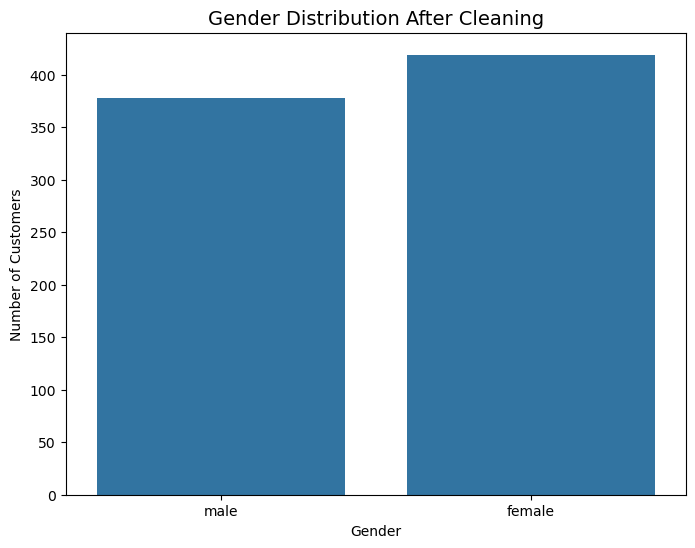

In [406]:
# 1. Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Gender')  
plt.title("Gender Distribution After Cleaning", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()



C:\Users\SMAGDY\AppData\Local\Temp\ipykernel_21864\1304974531.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


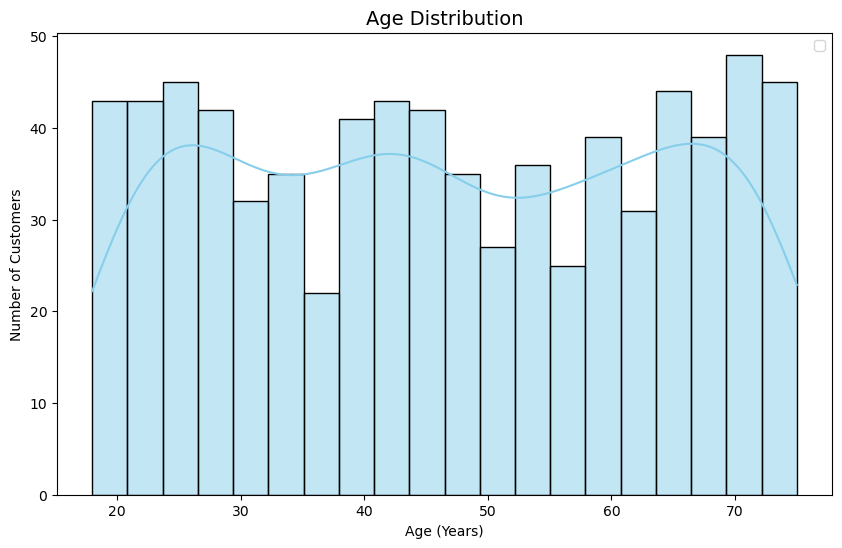

In [408]:
# 2. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=customers, x='Age', bins=20, kde=True, color='skyblue')
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age (Years)")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

C:\Users\SMAGDY\AppData\Local\Temp\ipykernel_21864\990856326.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')


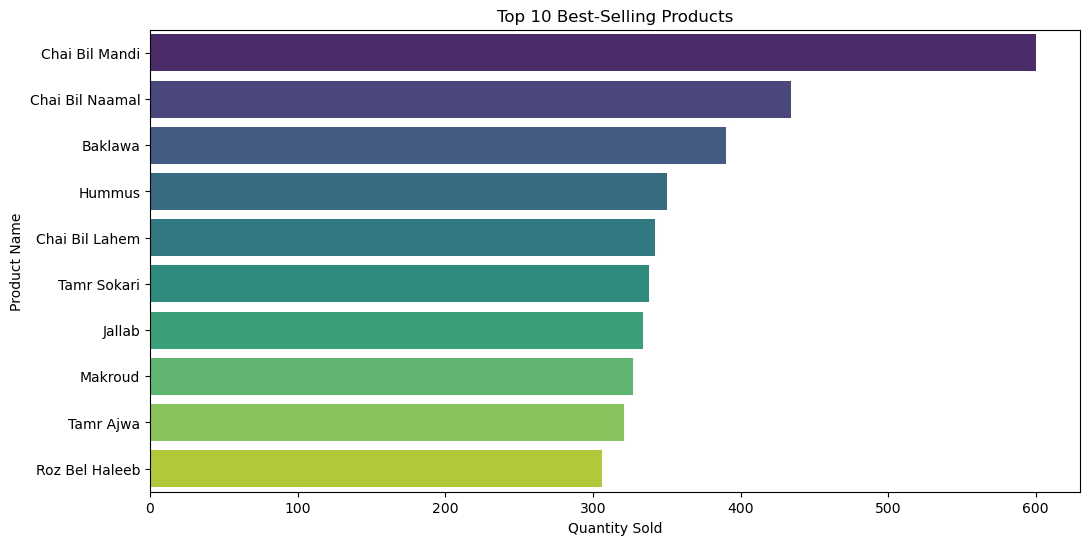

In [410]:
#Product Analysis

# Top 10 products by sales
top_products = full_data.groupby('Pro_Name')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

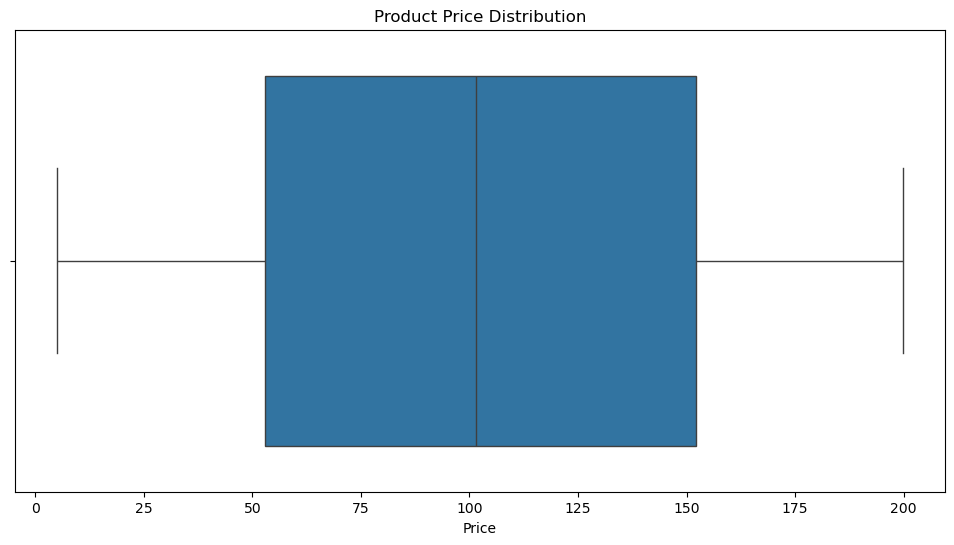

In [412]:
# Price distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x=products['Price'])
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.show()

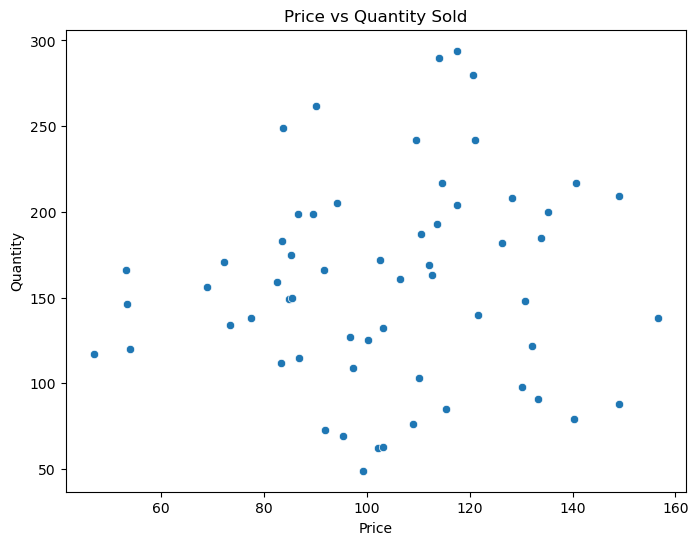

In [414]:
# Merge price with order details
order_details_with_price = order_details.merge(
    products[["Pro_ID", "Price", "Pro_Name"]],
    left_on="Product_ID",
    right_on="Pro_ID",
    how="left")
# Calculate revenues
product_revenue = order_details_with_price.groupby("Pro_Name").agg({
    "Quantity": "sum",
    "Price": "mean"
}).reset_index()
product_revenue["Revenue"] = product_revenue["Quantity"] * product_revenue["Price"]


# Relationship between price and quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=product_revenue, x="Price", y="Quantity")
plt.title("Price vs Quantity Sold")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()

Total Sales: 533543.92


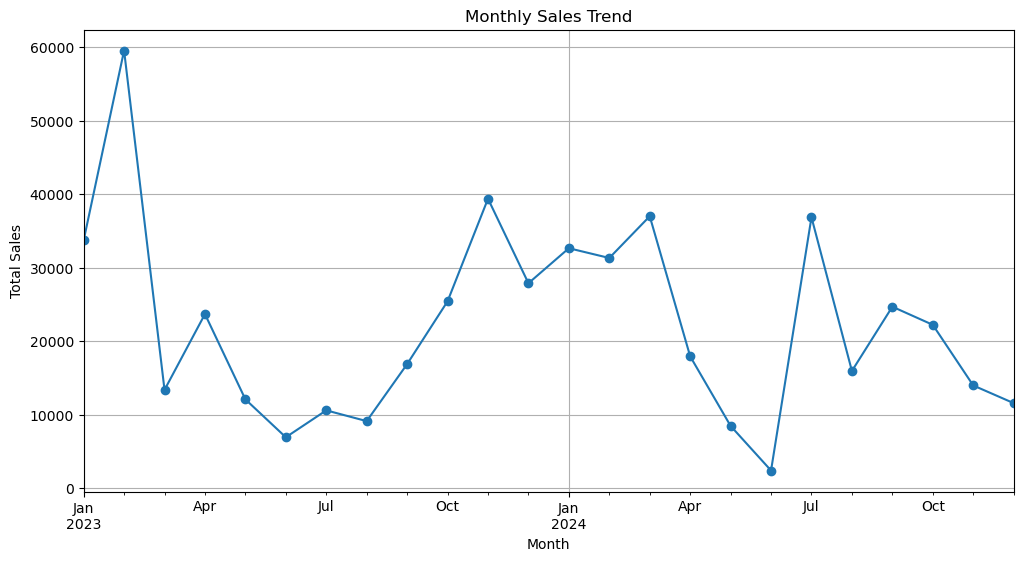

In [418]:
#Sales Analysis

#Total Sales
total_sales = full_data['Total_Price'].sum()
print(f"Total Sales: {total_sales:}")


# Monthly sales trend
full_data['Month'] = full_data['Date'].dt.to_period('M')

monthly_sales = full_data.groupby('Month')['Total_Price'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



C:\Users\SMAGDY\AppData\Local\Temp\ipykernel_21864\1864683313.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=status_sales.index, x=status_sales.values,


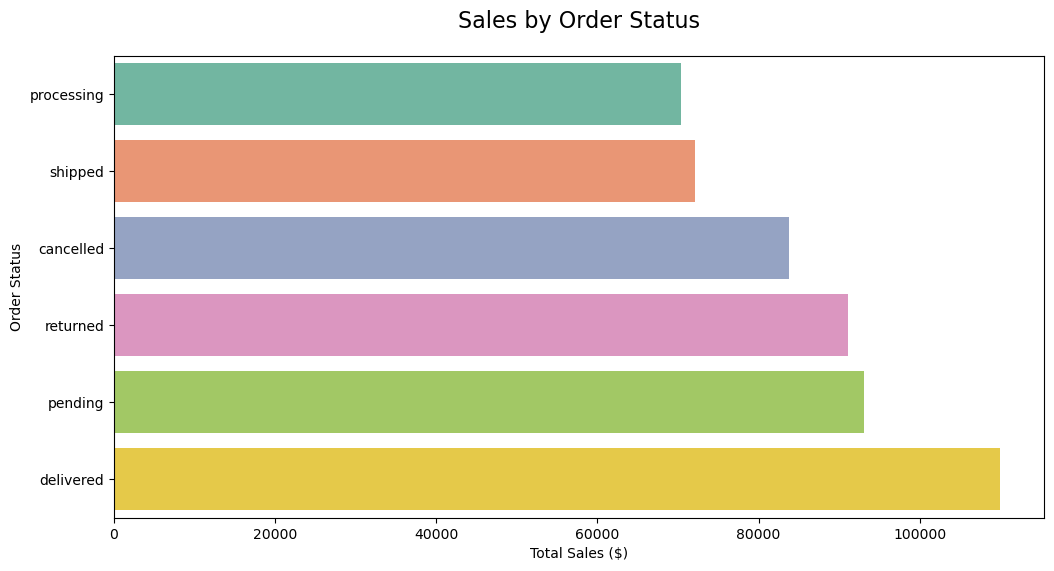

In [420]:
# تنظيف عمود Status من التكرارات بسبب الحروف أو المسافات
full_data['Status'] = full_data['Status'].str.strip().str.lower()


#Sales by Order Status
status_sales = full_data.groupby('Status')['Total_Price'].sum().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(y=status_sales.index, x=status_sales.values, 
            palette=sns.color_palette("Set2", n_colors=len(status_sales)))
plt.title('Sales by Order Status', pad=20, fontsize=16)
plt.xlabel('Total Sales ($)')
plt.ylabel('Order Status')
plt.show()

C:\Users\SMAGDY\AppData\Local\Temp\ipykernel_21864\1173082239.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=payment_counts.index, x=payment_counts.values,


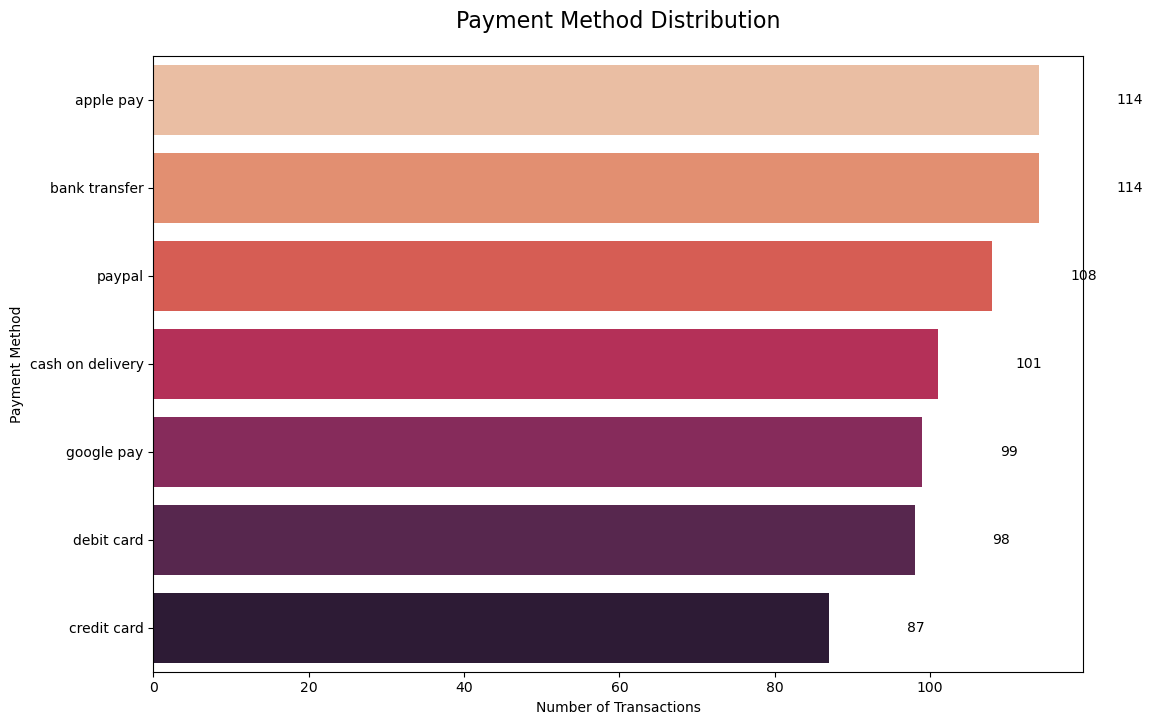

In [398]:
#Payment Analysis

#Payment Method Distribution
payment_counts = payments['Payment_Method'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=payment_counts.index, x=payment_counts.values, 
            palette='rocket_r')
plt.title('Payment Method Distribution', pad=20, fontsize=16)
plt.xlabel('Number of Transactions')
plt.ylabel('Payment Method')
for i, v in enumerate(payment_counts.values):
    plt.text(v + 10, i, str(v), color='black', va='center')
plt.show()


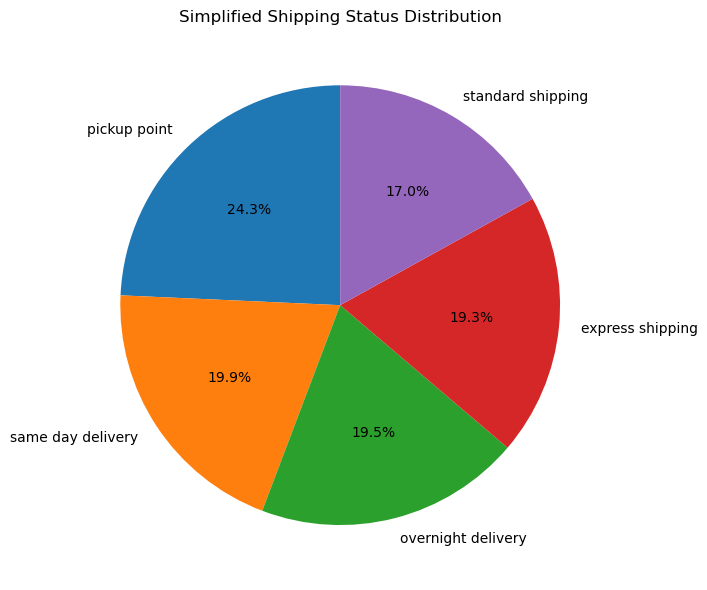

In [422]:
#Shipping Analysis


#Shipping Status Distribution
shipping_method_counts = shipping["Shipping_Method"].value_counts()
# Merge categories with less than 5% into 'Others'
threshold = 0.05 *shipping_method_counts.sum()
status_counts_cleaned = shipping_method_counts.copy()
status_counts_cleaned[shipping_method_counts < threshold] = 0
status_counts_cleaned['Other'] = shipping_method_counts[shipping_method_counts < threshold].sum()
plt.figure(figsize=(8, 6))
status_counts_cleaned[status_counts_cleaned > 0].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Simplified Shipping Status Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


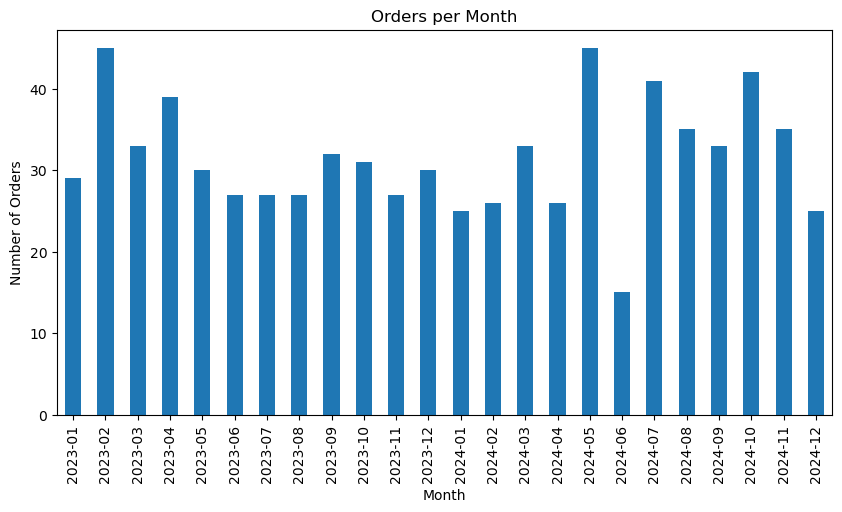

In [424]:
# Merge orders with payments
orders_with_payments = orders.merge(payments, on="Order_ID", how="left")
orders_with_payments["Payment_Gap"] = orders_with_payments["Total_Price"] - orders_with_payments["Amount"]
orders["Order_Date"] = pd.to_datetime(orders["Date"])
# Orders by month
orders["Month"] = orders["Date"].dt.to_period("M")
monthly_orders = orders["Month"].value_counts().sort_index()

monthly_orders.plot(kind="bar", figsize=(10, 5), title="Orders per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

C:\Users\SMAGDY\AppData\Local\Temp\ipykernel_21864\1036085534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=full_data, x='Rating', palette='flare')


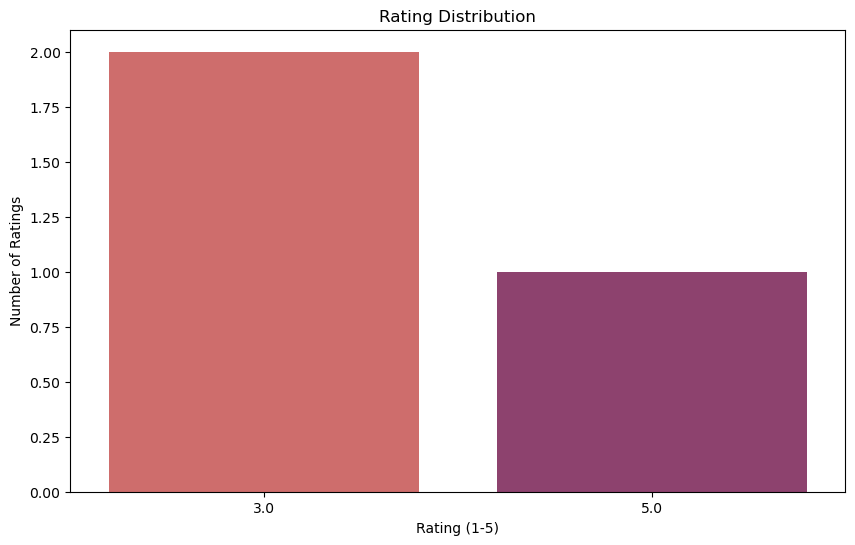

In [426]:
# Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=full_data, x='Rating', palette='flare')
plt.title('Rating Distribution')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Ratings')
plt.show()

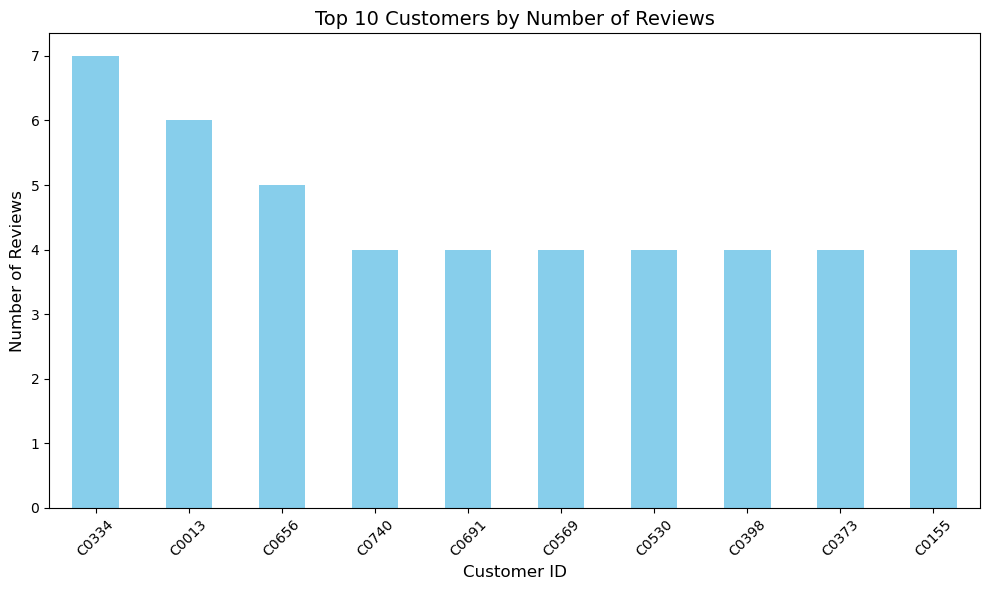

In [428]:
#Review Analysis

#Top 10 Customers by Number of Reviews
top_customers = reviews['Cus_ID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Number of Reviews', fontsize=14)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\SMAGDY\AppData\Local\Temp\ipykernel_21864\4057773611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=reviews, x='Rating', palette='flare')


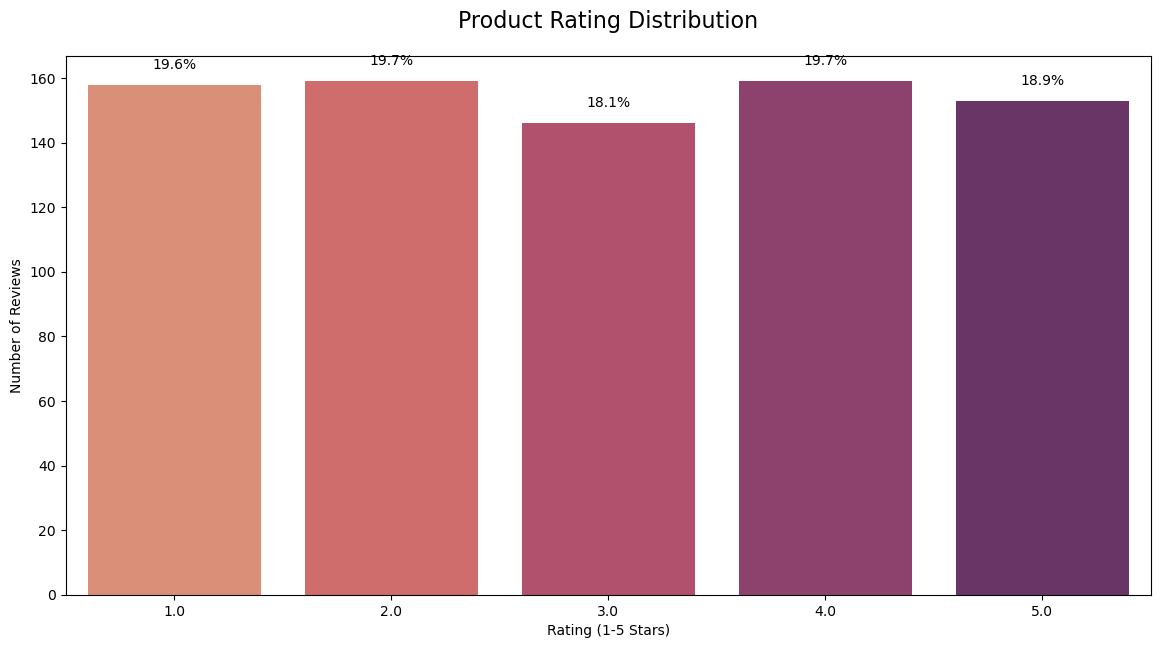

In [430]:
#Rating Distribution
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=reviews, x='Rating', palette='flare')
plt.title('Product Rating Distribution', pad=20, fontsize=16)
plt.xlabel('Rating (1-5 Stars)')
plt.ylabel('Number of Reviews')


# Add percentage labels
total = len(reviews)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha='center')
    
plt.show()

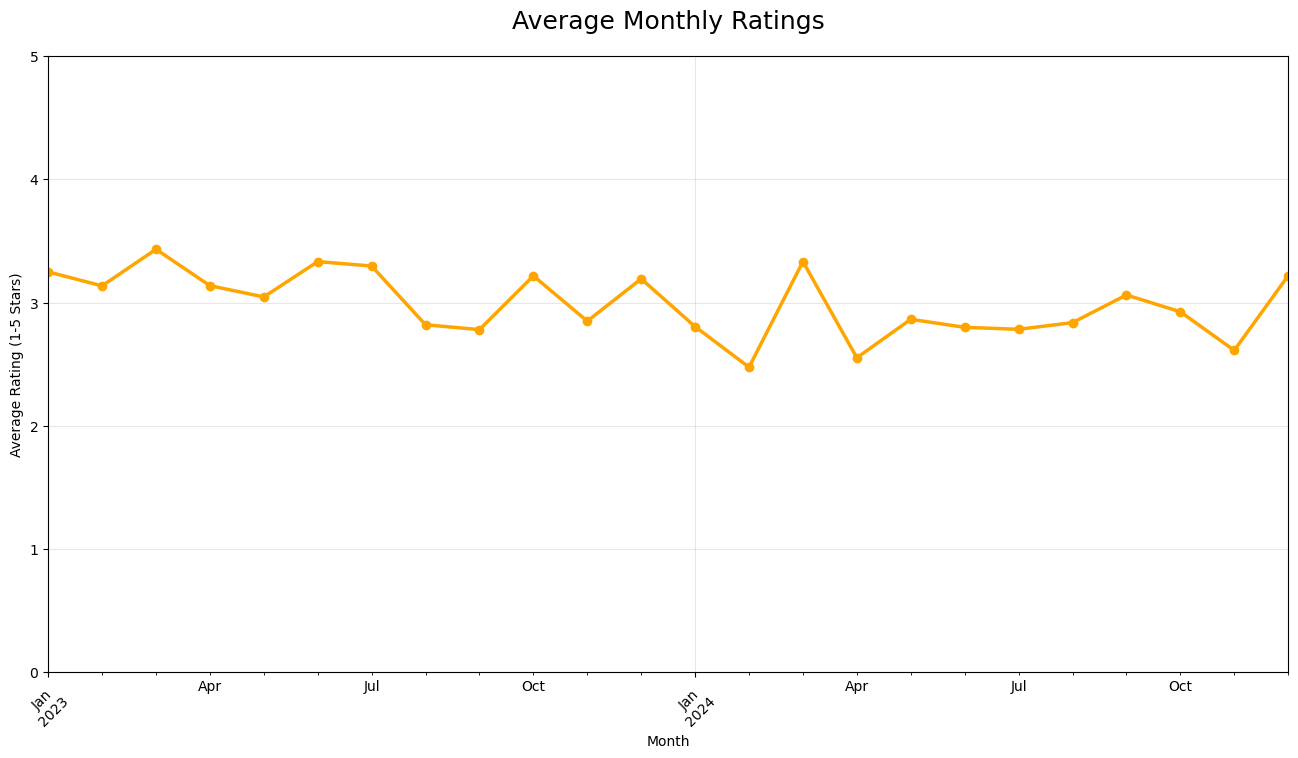

In [432]:
#Rating Over Time
reviews['Review_Month'] = reviews['Review_Date'].dt.to_period('M')
monthly_ratings = reviews.groupby('Review_Month')['Rating'].mean()

plt.figure(figsize=(16, 8))
monthly_ratings.plot(kind='line', marker='o', color='orange', linewidth=2.5)
plt.title('Average Monthly Ratings', pad=20, fontsize=18)
plt.xlabel('Month')
plt.ylabel('Average Rating (1-5 Stars)')
plt.ylim(0, 5)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

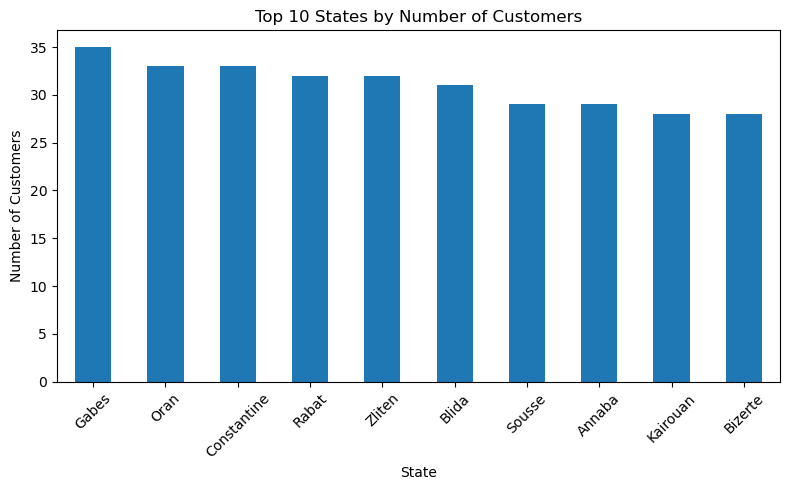

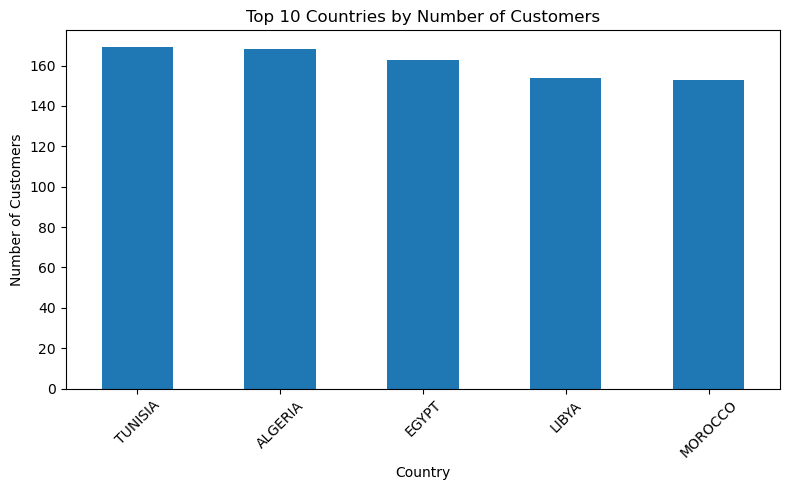

C:\Users\SMAGDY\AppData\Local\Temp\ipykernel_21864\43485689.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_counts.index, x=city_counts.values, palette='mako_r')


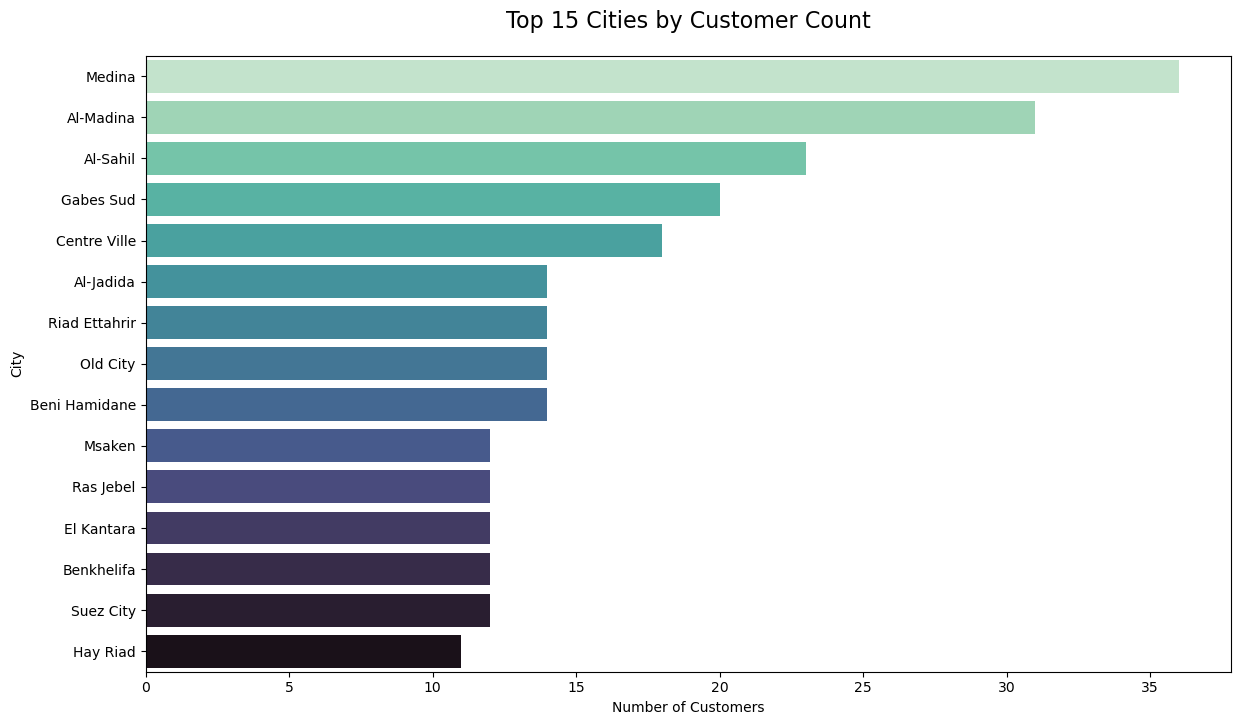

In [358]:
#Geographic Analysis
#Customer Locations

# Top States
plt.figure(figsize=(8,5))
top_states.plot(kind='bar')
plt.title("Top 10 States by Number of Customers")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
top_countries = locations['Country'].value_counts().head(10)
top_states = locations['State'].value_counts().head(10)
top_cities = locations['City'].value_counts().head(10)
top_regions = locations['Region'].value_counts().head(10)

# Top Countries
plt.figure(figsize=(8,5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Number of Customers")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Top Cities
city_counts = locations['City'].value_counts().head(15)

plt.figure(figsize=(14, 8))
sns.barplot(y=city_counts.index, x=city_counts.values, palette='mako_r')
plt.title('Top 15 Cities by Customer Count', pad=20, fontsize=16)
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.show()